# Testing `plotting` module

**Authorship:**
Adam Klie, *07/12/2022*
***
**Description:**

In [2]:
import numpy as np
import pandas as pd

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

In [3]:
import eugene as eu

Global seed set to 13
Global seed set to 13
Global seed set to 13


# Load data

In [5]:
# Loads a random dataset of 1000 sequences of length 66
sdata = eu.datasets.random1000(binary=True)

# Preprocess data

In [6]:

# Preprocess the data for training (prepare_data wraps these)
eu.pp.prepare_data(sdata)
sdata

  0%|          | 0/3 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added
	ohe_seqs: None -> 1000 ohe_seqs added
    seqs_annot:
        + TRAIN


SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = (1000,)
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = None
seqs_annot: 'TARGETS', 'TRAIN'
pos_annot: PyRanges object with 1456 features

# Instantiate model

In [7]:
# Loads the default DeepBind architecture
eugene = eu.models.DeepBind(input_len=66, task="binary_classification")
eu.models.base.init_weights(eugene)

/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


# Prepare Dataloader

In [8]:
sdataset = sdata.to_dataset(label="TARGETS", seq_transforms=["one_hot_encode"], transform_kwargs={"transpose": True})
sdataloader = sdataset.to_dataloader()

# Train the model

In [9]:
eu.train.fit(eugene, sdata=sdata, epochs=1, log_dir="../_logs")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type                      | Params
-------------------------------------------------------
0 | max_pool | MaxPool1d                 | 0     
1 | avg_pool | AvgPool1d                 | 0     
2 | convnet  | BasicConv1D               | 272   
3 | fcn      | BasicFullyConnectedModule | 146 K 
4 | accuracy | Accuracy                  | 0     
5 | auroc    | AUROC                     | 0     
-------------------------------------------------------
147 K     Trainable params
0         Non-trainable params
147 K     Total params
0.588     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/cellar/users/aklie/opt/miniconda3/envs/

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + PREDICTIONS


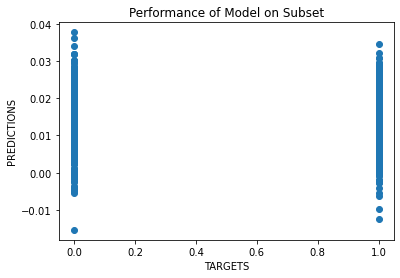

In [11]:
eu.pl.performance_scatter(sdata)

In [13]:
from sklearn.metrics import confusion_matrix

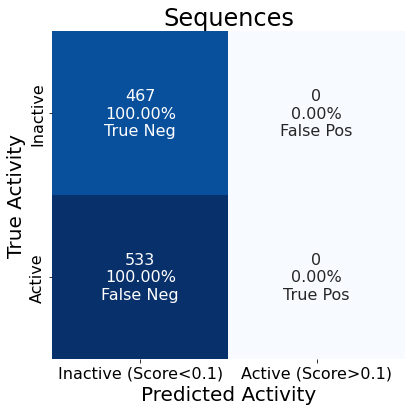

In [20]:
eu.pl.confusion_mtx(sdata, threshold=0.1)

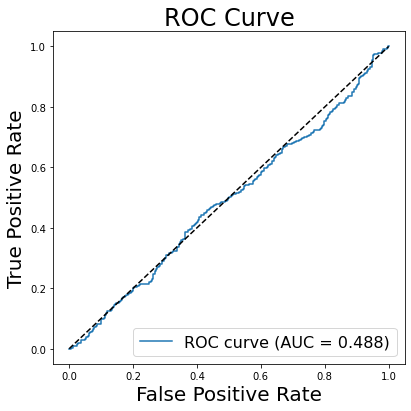

In [27]:
eu.pl.auroc(sdata[sdata.seqs_annot["TRAIN"] == True])

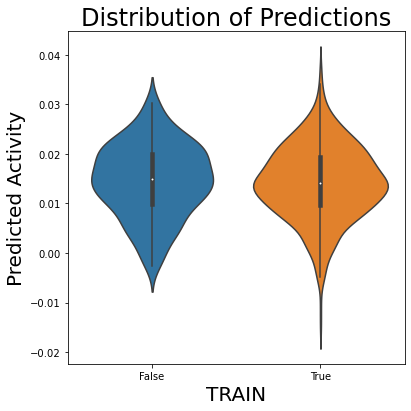

In [29]:
eu.pl.violin(sdata, category="TRAIN")

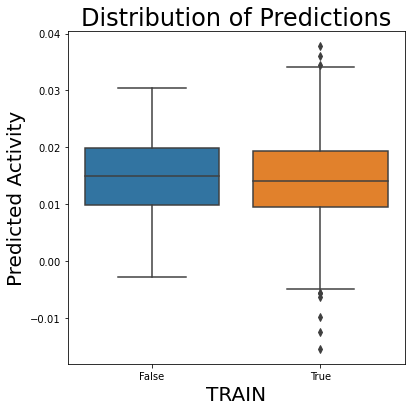

In [31]:
eu.pl.boxplot(sdata, category="TRAIN")

# Predict with model 

In [9]:
eu.predict.predictions(eugene, sdataloader=sdataloader, target_label="TARGETS", batch_size=1, num_workers=0, out_dir="../_out/test_")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

/mnt/beegfs/users/aklie/projects/EUGENE/eugene/predict/_predict.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t = np.concatenate(np.array(trainer.predict(model, sdataloader)), axis=0)


,0
seq001,0.35963845
seq002,0.41061306
seq003,0.39608538
seq004,0.40585387
seq005,0.40117908
...,...
seq996,0.3827901
seq997,0.39743
seq998,0.38069797
seq999,0.41830504


# Interpret the model

In [10]:
eu.interpret.feature_attribution(eugene, sdata)

  0%|          | 0/31 [00:00<?, ?it/s]

array([[[ 0.        ,  0.        ,  0.00641138, ...,  0.00272099,
          0.        ,  0.        ],
        [-0.        ,  0.        , -0.        , ..., -0.        ,
          0.        ,  0.00364729],
        [ 0.00399181, -0.        , -0.        , ..., -0.        ,
          0.00248242,  0.        ],
        [-0.        ,  0.00491963,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.        ,  0.00451582,  0.        , ...,  0.        ,
          0.        ,  0.00158742],
        [-0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.        ,  0.        ],
        [ 0.        , -0.        ,  0.        , ..., -0.        ,
          0.        ,  0.        ],
        [ 0.00161232,  0.        ,  0.00241995, ...,  0.00435137,
          0.00183829, -0.        ]],

       [[-0.00056602,  0.00576064,  0.        , ...,  0.        ,
          0.        , -0.        ],
        [ 0.        , -0.        ,  0.        , ...,  0.01109879,
          0.

In [12]:
eu.get_pfms(eugene, sdata)

AttributeError: module 'eugene' has no attribute 'get_pfms'

---

# Scratch